In [15]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [16]:
df = pd.read_csv("sim_data_full.csv")

In [17]:
df_pfpr = df[df["baseline_transmission_metric"]=="pfpr"].reset_index(drop=True)
df_pfpr = df_pfpr[df_pfpr["transmission_level"] > 0.01].reset_index(drop=True)

In [19]:
set(df["archetype"])

{'Central', 'Sahel', 'Southern'}

# Sweep over health-seeking rate

meta NOT subset; don't know how to subset; dropped


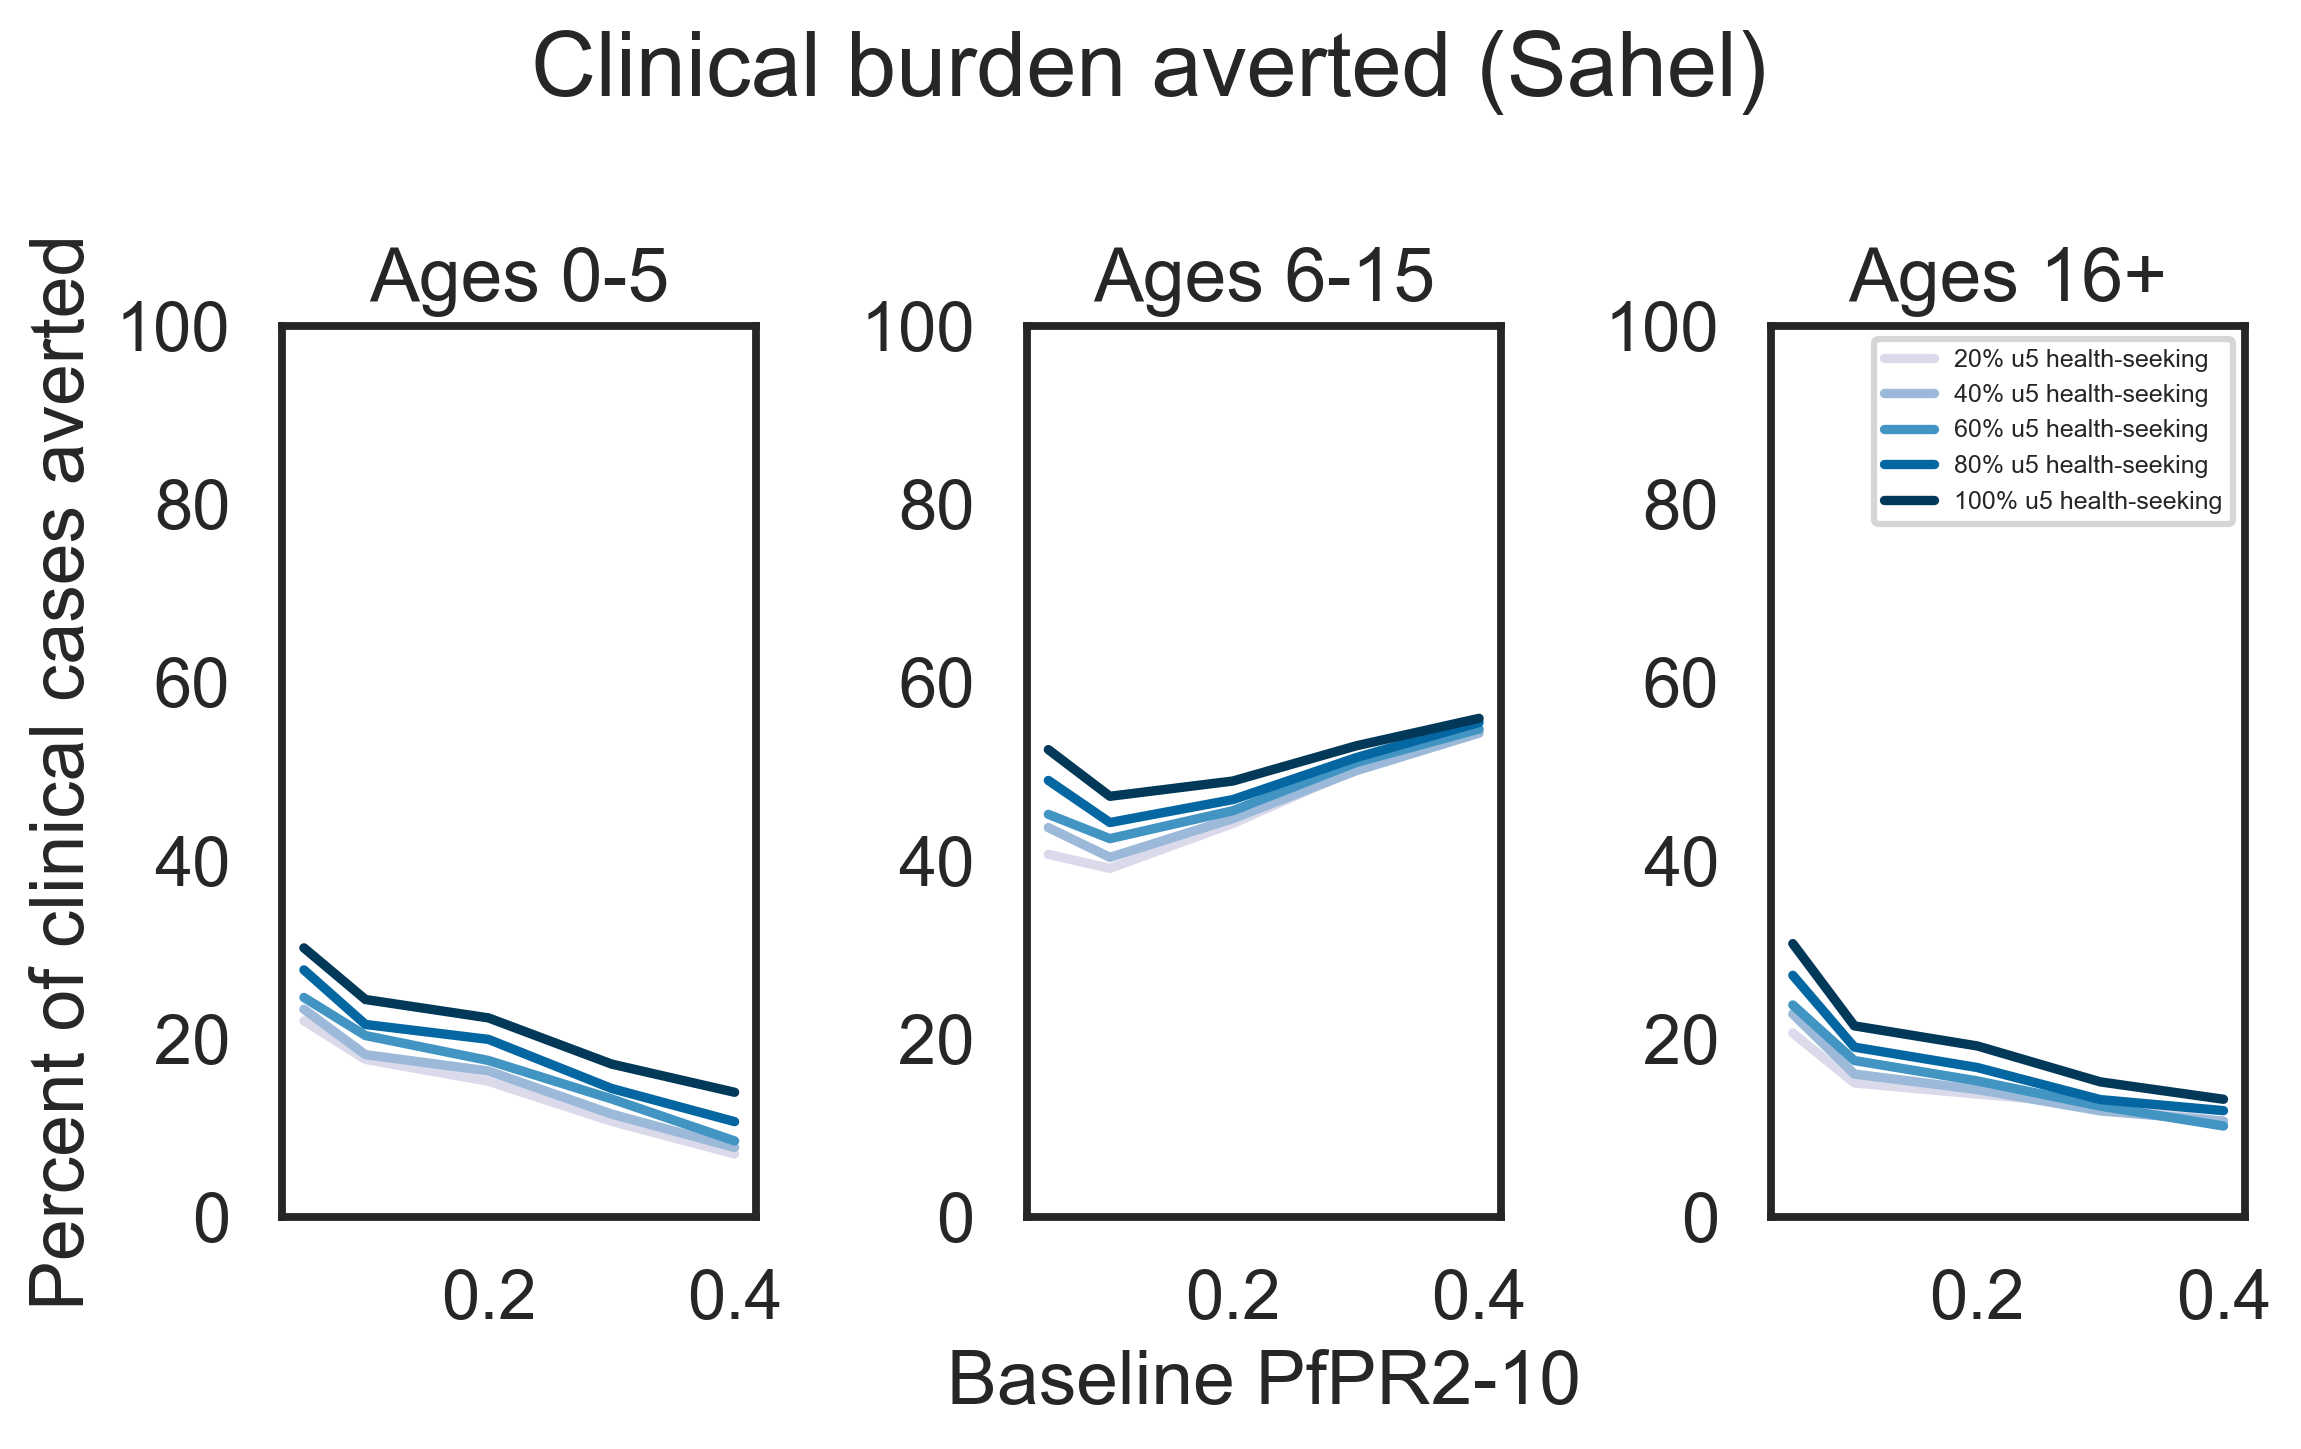

In [6]:
archetype = "Sahel"
control_scenarios = [50,51,52,30,53]
intervention_scenarios = [46,47,48,13,49]

base_by_hs = df_pfpr[np.logical_and(df_pfpr["archetype"]==archetype, np.in1d(df_pfpr["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["transmission_level","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["transmission_level"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]*100
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Sahel)")
plt.tight_layout()
plt.savefig("cases_averted_by_hs_sahel.pdf")

meta NOT subset; don't know how to subset; dropped


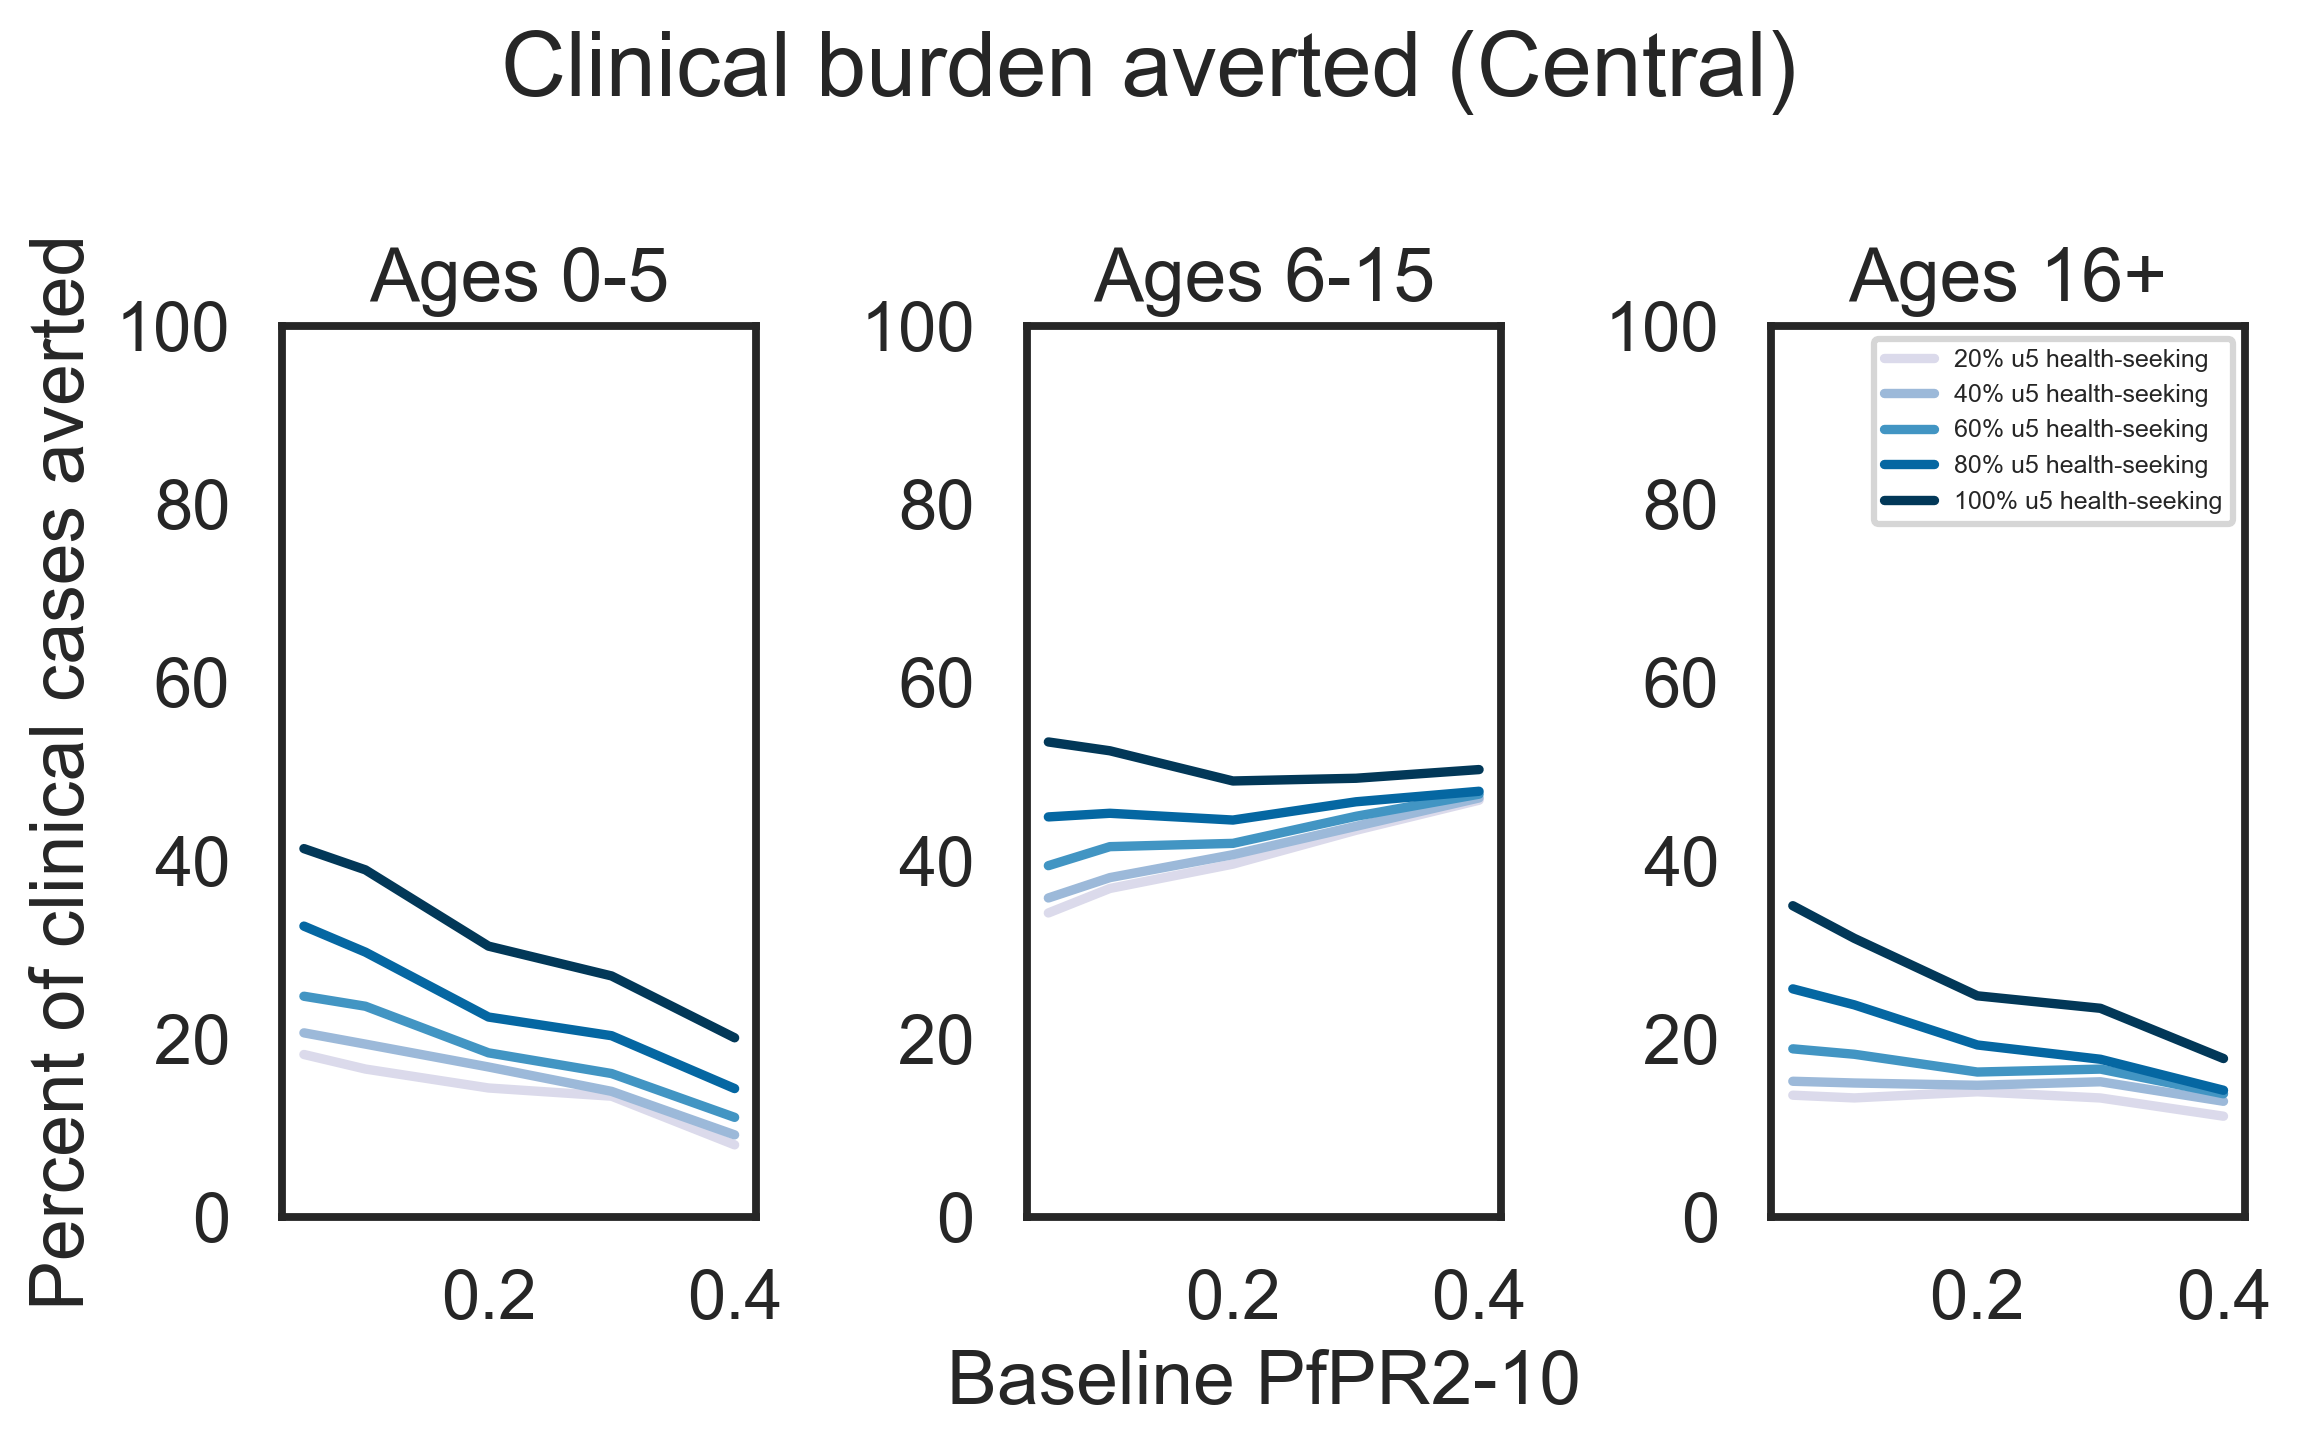

In [7]:
archetype = "Central"
control_scenarios = [42,43,44,30,45]
intervention_scenarios = [38,39,40,13,41]

base_by_hs = df_pfpr[np.logical_and(df_pfpr["archetype"]==archetype, np.in1d(df_pfpr["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["transmission_level","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["transmission_level"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]*100
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Central)")
plt.tight_layout()
plt.savefig("cases_averted_by_hs_central.pdf")

meta NOT subset; don't know how to subset; dropped


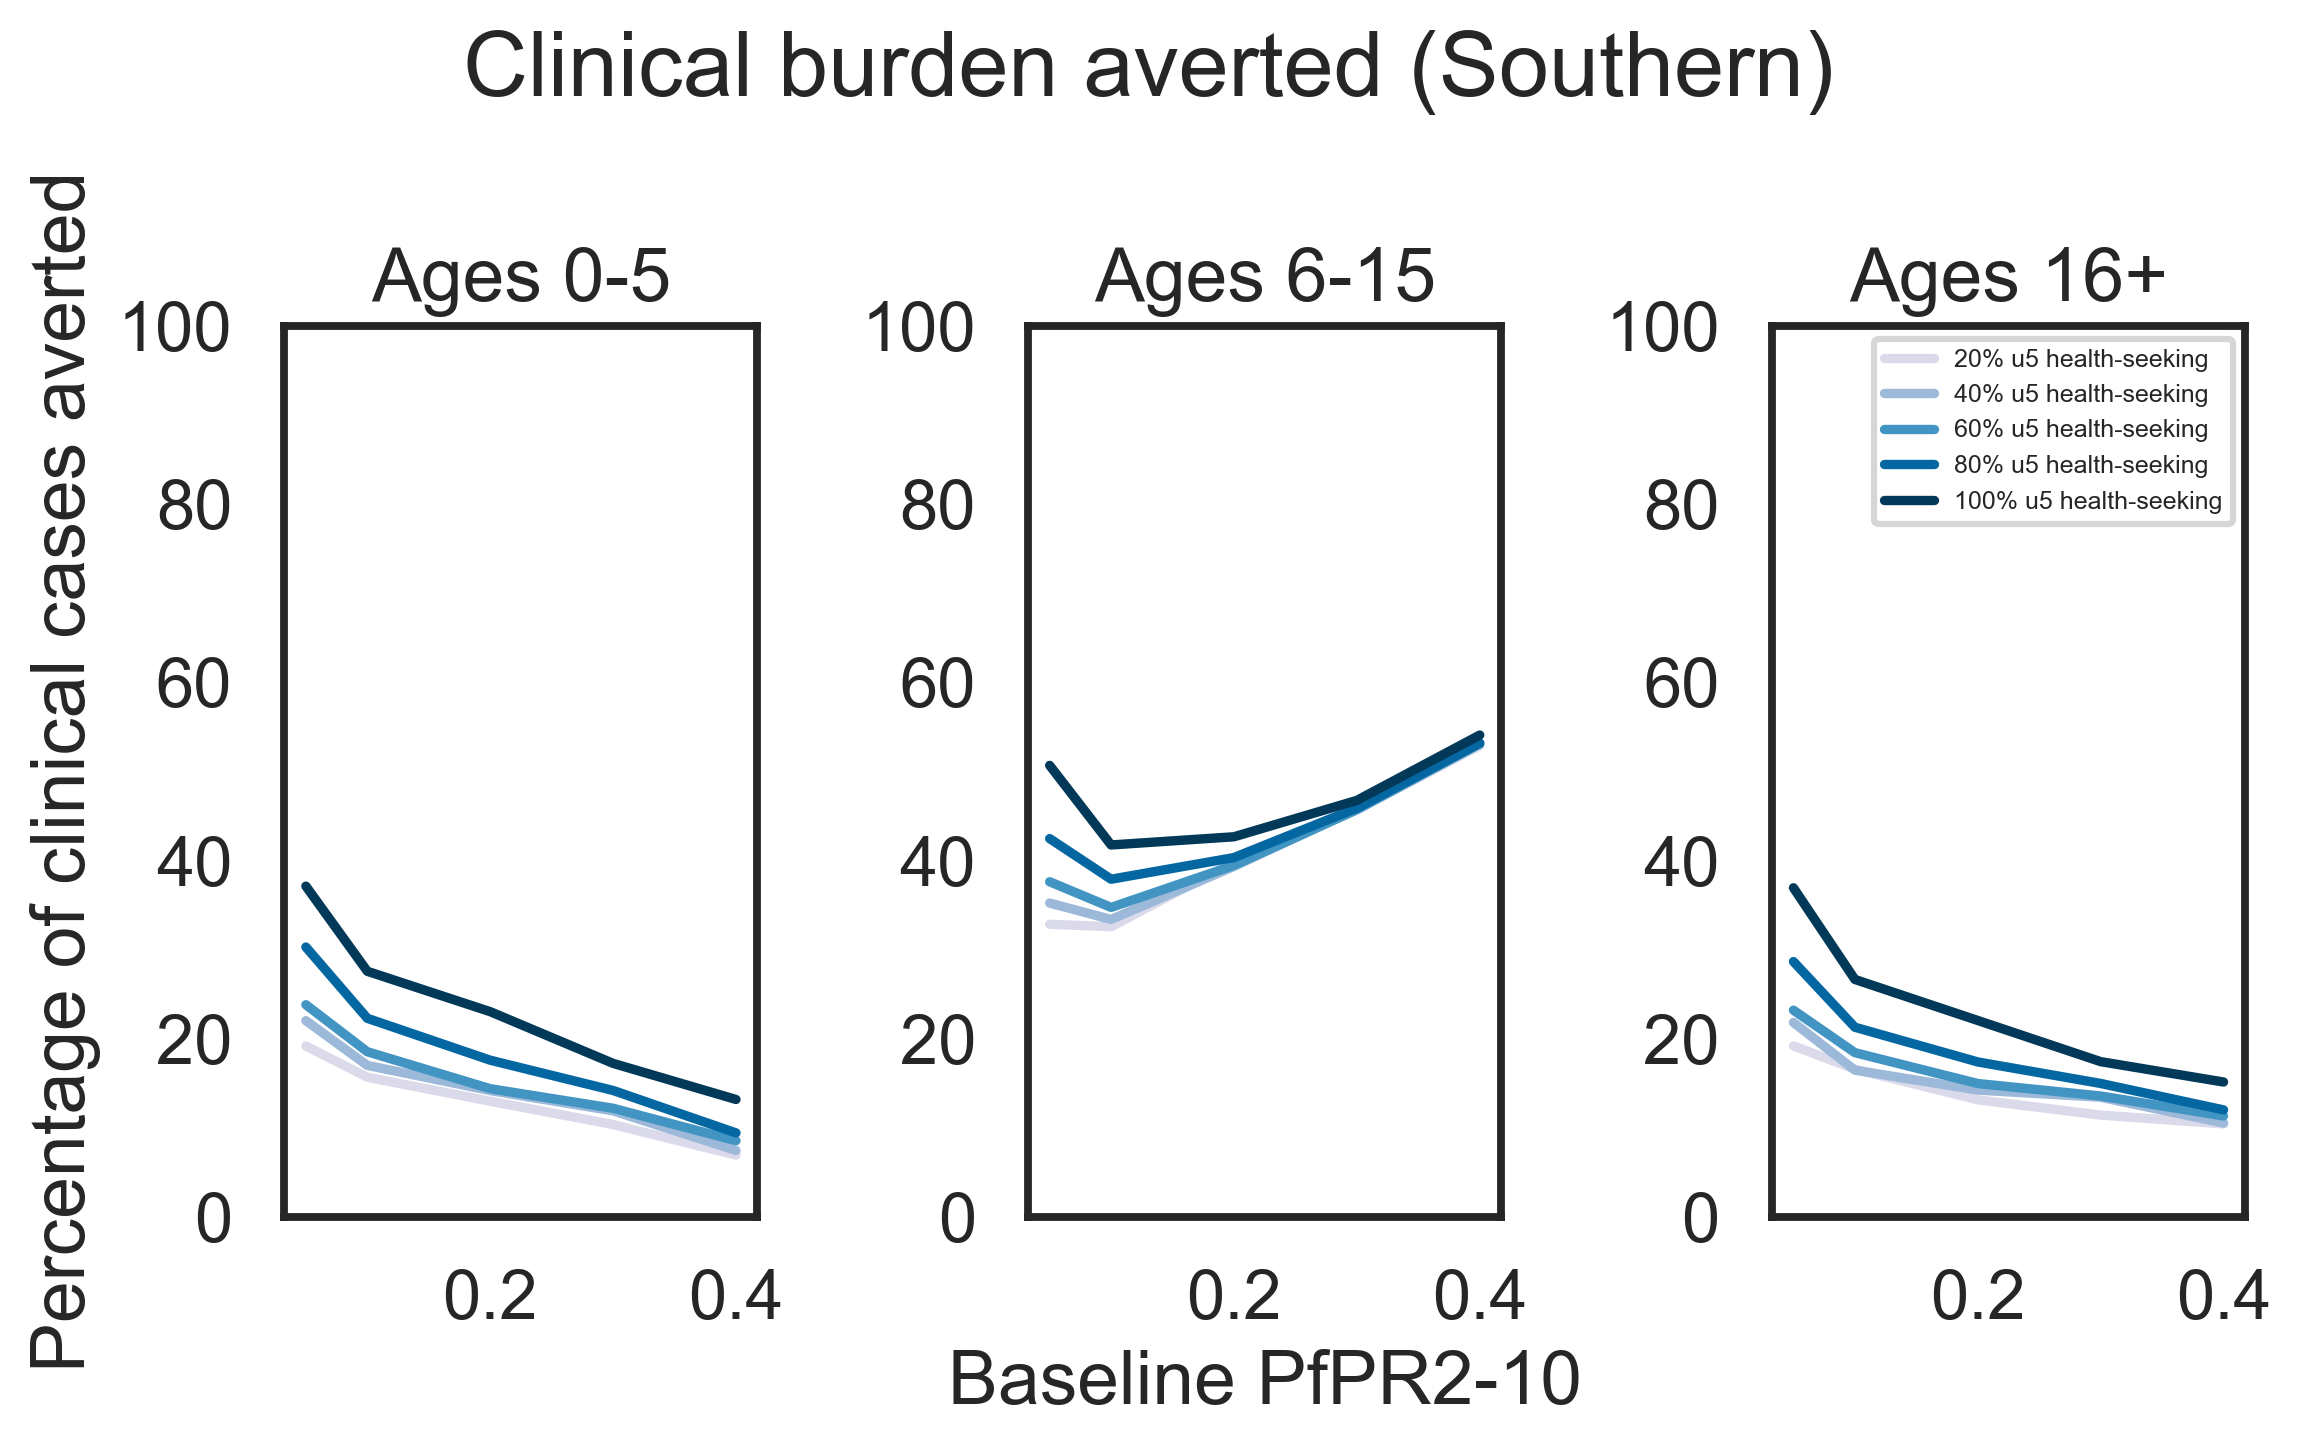

In [8]:
archetype = "Southern"
control_scenarios = [42,43,44,30,45]
intervention_scenarios = [38,39,40,13,41]

base_by_hs = df_pfpr[np.logical_and(df_pfpr["archetype"]==archetype, np.in1d(df_pfpr["scenario_number"], control_scenarios))]
base_by_hs = base_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
base_by_hs = base_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

int_by_hs = df[np.logical_and(df["archetype"]==archetype, np.in1d(df["scenario_number"], intervention_scenarios))]
int_by_hs = int_by_hs.groupby(["transmission_level", "hs_rate"]).agg("mean").reset_index()
int_by_hs = int_by_hs[["transmission_level", "hs_rate", "clinical_incidence0_5", "clinical_incidence6_15", "clinical_incidence16_500", "clinical_incidence_all"]]

ipt_by_hs = int_by_hs.merge(base_by_hs, on=["transmission_level","hs_rate"], suffixes=("","_BASELINE"))

# Add total clinical burden fields:
for agebin in ["0_5", "6_15","16_500","_all"]:
    for case_type in ["clinical"]:
        old = ipt_by_hs["{}_incidence{}_BASELINE".format(case_type, agebin)]
        new = ipt_by_hs["{}_incidence{}".format(case_type, agebin)]
        frac_averted = (old-new)/old
        
        ipt_by_hs["frac_averted_{}_{}".format(case_type, agebin)] = frac_averted
        
plt.figure(dpi=300, figsize=(8,5))
    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(1,3,i+1)
    
    for hs_rate in [0.2,0.4,0.6,0.8,1.0]:
        linestyle='solid'
        c = plt.cm.PuBu(hs_rate)
        label = f"{int(100*hs_rate)}% u5 health-seeking"

        sdf = ipt_by_hs[ipt_by_hs["hs_rate"]==hs_rate]
        x = sdf["transmission_level"]
        y = sdf["frac_averted_clinical_{}".format(agebin)]*100
        
        plt.plot(x,y, label=label, linestyle=linestyle, c=c)
        
        ax = plt.gca()
        # ax.set_yticks([0,20,40,60,80,100])
        # ax.set_yticklabels(["0%","20%","40%","60%","80%","100%"])
        if i == 2:
            plt.legend(fontsize=6)
        if i == 1:
            plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percentage of clinical cases averted")
        plt.ylim([0,100])
        plt.title(agebin_label)
plt.suptitle("Clinical burden averted (Southern)")
plt.tight_layout()
# plt.subplots_adjust(left=0)
plt.savefig("cases_averted_by_hs_southern.pdf")

# (Appendix): sweep over out-of-school rate

meta NOT subset; don't know how to subset; dropped


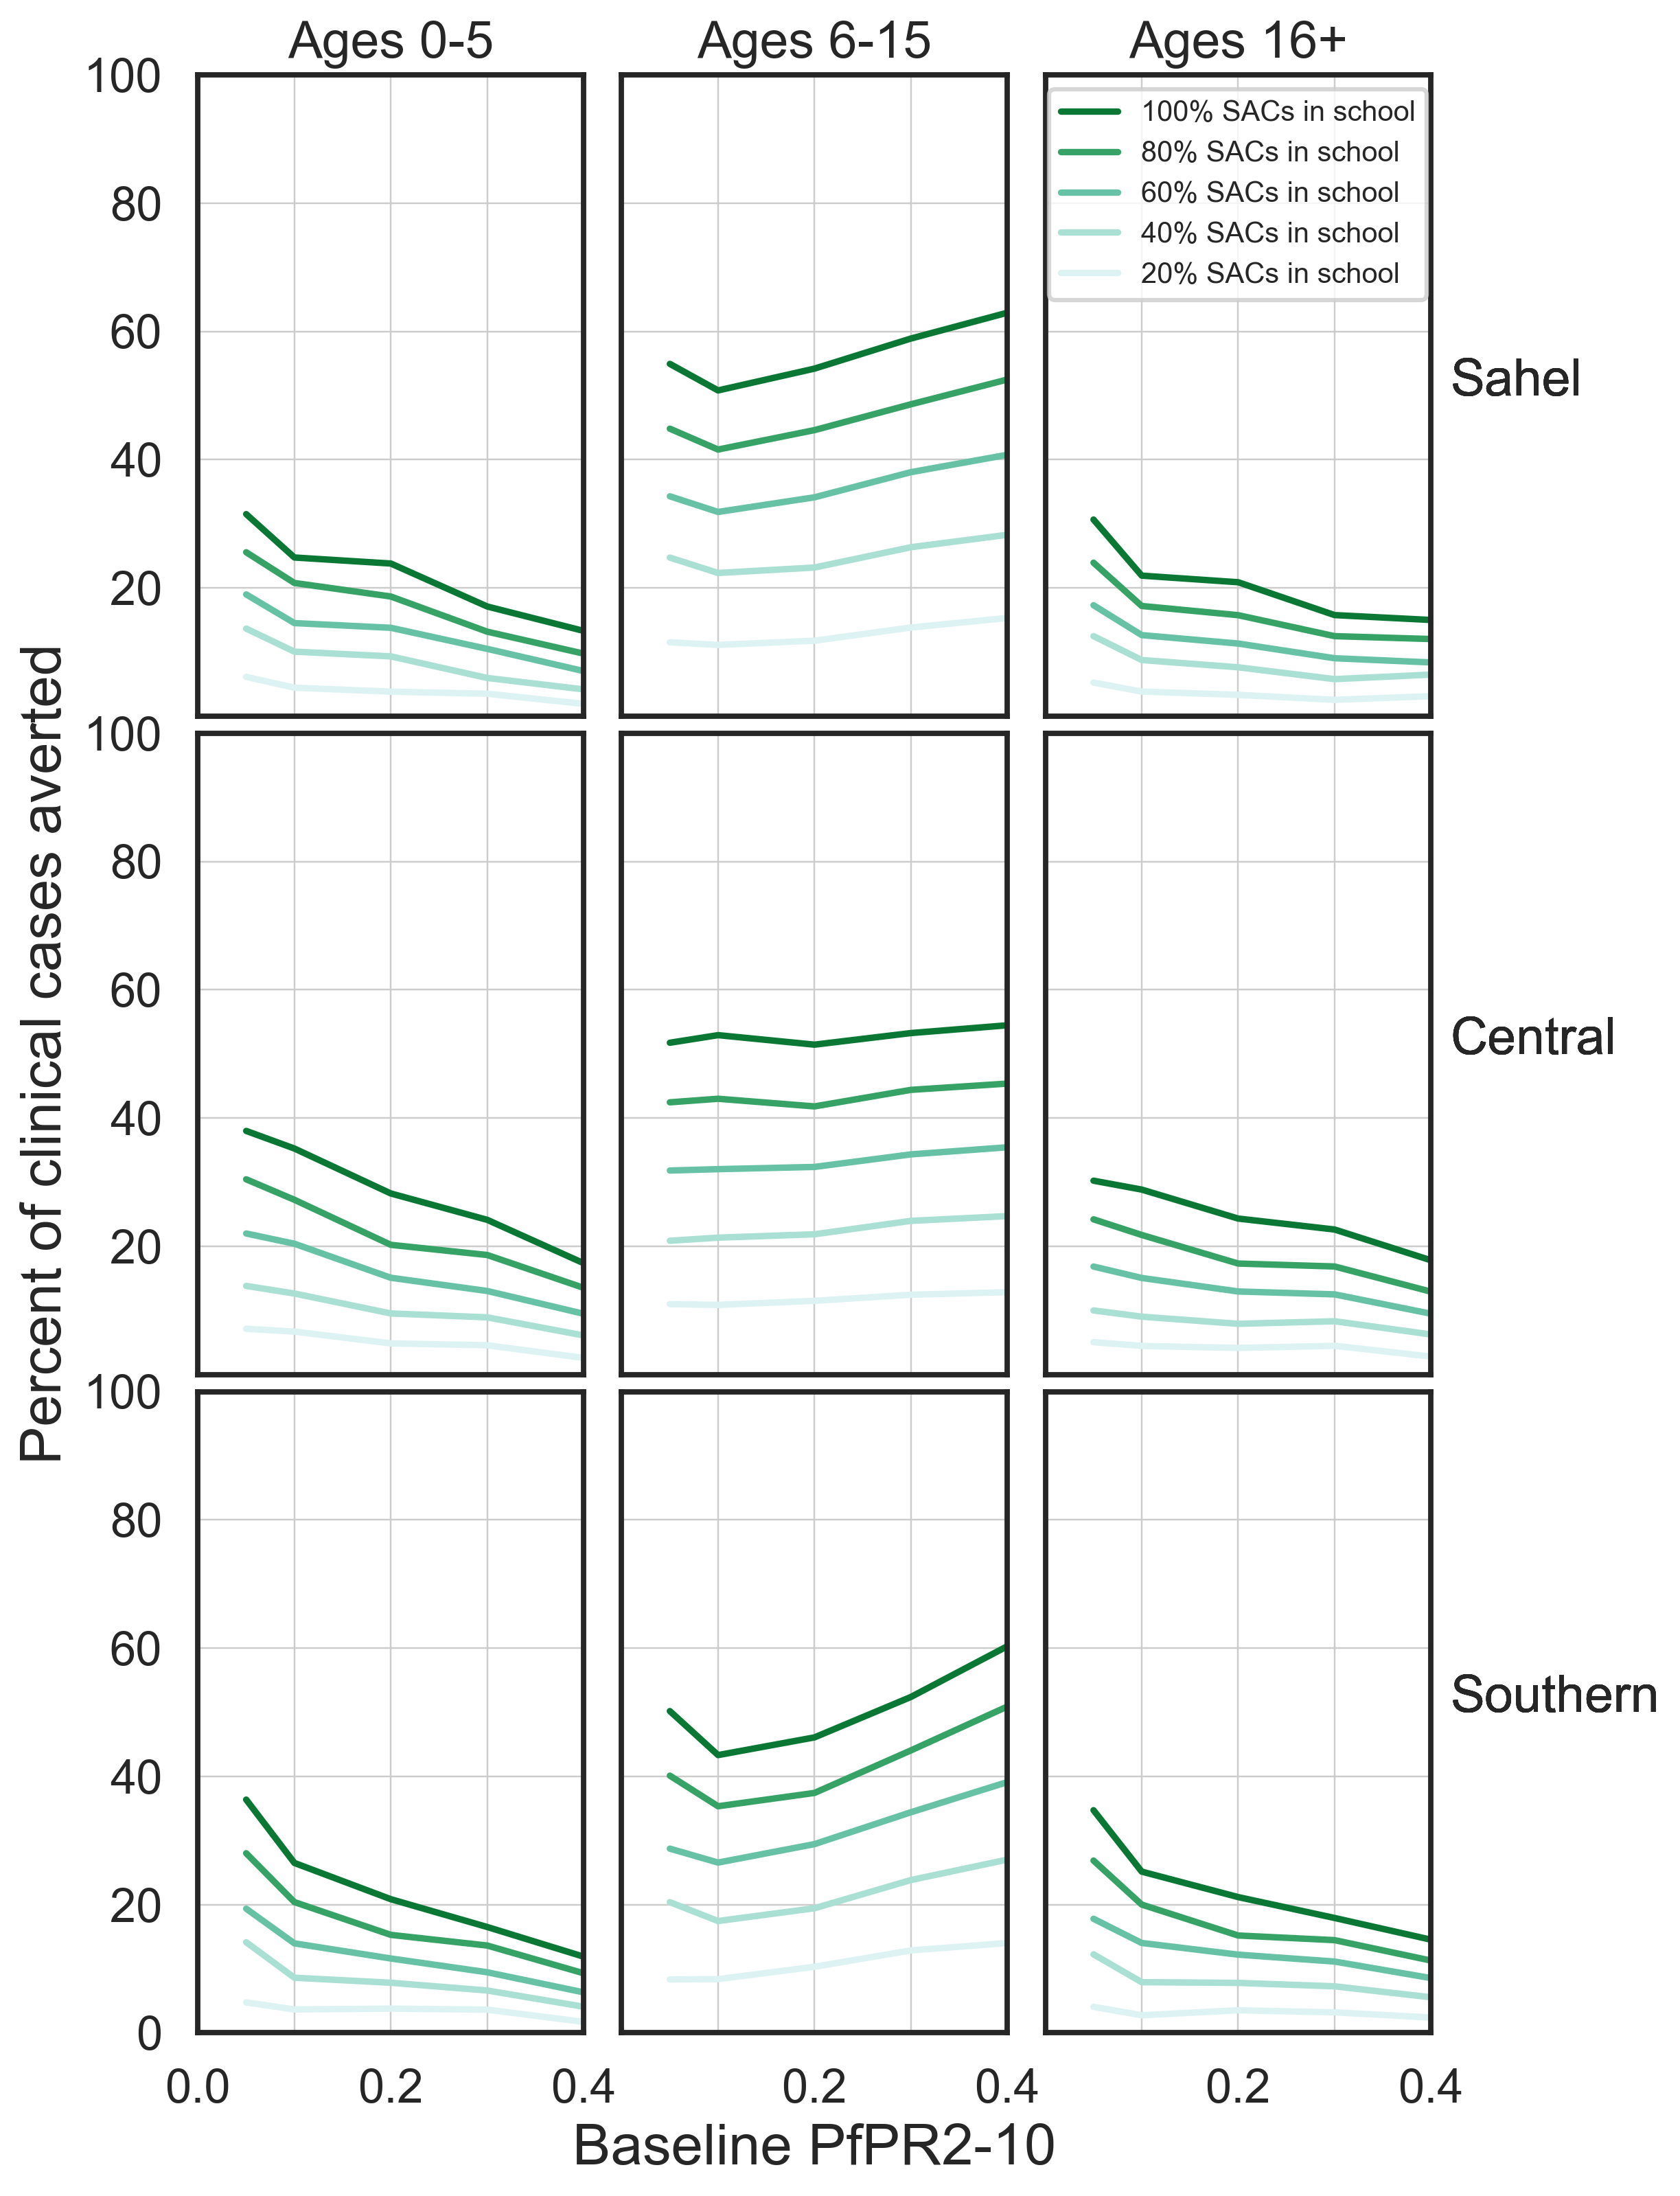

In [27]:
df_agg = df_pfpr[df_pfpr["archetype"]=="Sahel"]

label_dict = {
    54: "100% SACs in school",
    55: "80% SACs in school",
    56: "60% SACs in school",
    57: "40% SACs in school",
    58: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)
    
    
plt.figure(dpi=300, figsize=(8.5,11))

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(3,3,i+1)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]*100
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        if i == 2:
            plt.legend(fontsize=10, loc="upper center")
        # if i == 1:
        #     plt.xlabel("Baseline PfPR2-10")
        # if i == 0:
        #     plt.ylabel("Percent of clinical cases averted")
        if i == 0:
            plt.yticks([20,40,60,80,100])
        else:
            plt.yticks([])
        plt.xticks([])
        plt.ylim([0,100])
        plt.title(agebin_label)
        
        plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)
        
        plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
        # plt.axvline(0.4, c="#CCCCCB", zorder=0)
        plt.xlim([0.0,0.4])
        
        if i == 2:
            plt.text(0.42,50,"Sahel")
            


# ============================================================
# CENTRAL

df_agg = df_pfpr[df_pfpr["archetype"]=="Central"]

label_dict = {
    46: "100% SACs in school",
    47: "80% SACs in school",
    48: "60% SACs in school",
    49: "40% SACs in school",
    50: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)
    
    

    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(3,3,i+1+3)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]*100
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        # if i == 2:
        #     plt.legend(fontsize=10, loc="upper center")
        # if i == 1:
        #     plt.xlabel("Baseline PfPR2-10")
        if i == 0:
            plt.ylabel("Percent of clinical cases averted", fontsize=20)
        if i == 0:
            plt.yticks([20,40,60,80,100])
        else:
            plt.yticks([])
        plt.xticks([])
        plt.ylim([0,100])
        
        plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)
        
        plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
        # plt.axvline(0.4, c="#CCCCCB", zorder=0)
        plt.xlim([0.0,0.4])
        
        if i == 2:
            plt.text(0.42,50,"Central")

# =============================================================
# SOUTHERN

df_agg = df_pfpr[df_pfpr["archetype"]=="Southern"]

label_dict = {
    46: "100% SACs in school",
    47: "80% SACs in school",
    48: "60% SACs in school",
    49: "40% SACs in school",
    50: "20% SACs in school"
}

scenario_list = list(label_dict.keys())

s_dict = {}
for s in scenario_list:
    s_dict[s] = df_agg[df_agg["scenario_number"]==s]

    
color_dict = {}
for i in range(5):
    color_dict[scenario_list[i]] = plt.cm.BuGn_r((i+1)/6)   # "C{}".format(i)


    
agebins = ["0_5", "6_15", "16_500"]
agebin_labels = ["Ages 0-5", "Ages 6-15", "Ages 16+"]

for i in range(3):
    agebin = agebins[i]
    agebin_label = agebin_labels[i]
    plt.subplot(3,3,i+1+6)
    
    for s in scenario_list:
        linestyle='solid'
        if color_dict:
            c = color_dict[s]

        x = s_dict[s]["transmission_level"]
        y = s_dict[s]["frac_averted_clinical_{}".format(agebin)]*100
        plt.plot(x,y, label=label_dict[s], linestyle=linestyle, c=c)
        # if i == 2:
        #     plt.legend(fontsize=10, loc="upper center")
        if i == 1:
            plt.xlabel("Baseline PfPR2-10", fontsize=20)
        # if i == 0:
        #     plt.ylabel("Percent of clinical cases averted")
        if i != 0:
            plt.yticks([])
        plt.ylim([0,100])
        
        plt.axhline(80, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(60, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(40, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axhline(20, c="#CCCCCB", zorder=0, lw=0.5)
        
        plt.axvline(0.1, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.2, c="#CCCCCB", zorder=0, lw=0.5)
        plt.axvline(0.3, c="#CCCCCB", zorder=0, lw=0.5)
        # plt.axvline(0.4, c="#CCCCCB", zorder=0)
        plt.xlim([0.0,0.4])
        if i == 0:
            plt.xticks([0,0.2,0.4])
        else:
            plt.xticks([0.2,0.4])
        # plt.title(agebin_label)
        
        if i == 2:
            plt.text(0.42,50,"Southern")

plt.tight_layout(w_pad=0.1,h_pad=0)
plt.savefig("cases_averted_by_oosr_all_archetypes.pdf")